**1. Import libraries**

In [71]:
#Import libraries
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


**2. Dataset**

In [54]:
#Upload dataset
df = pd.read_csv('sample_data/mental_disorders.csv')

print(df.shape)
print(df.columns)
print(df.info())
print(df.head())

#We dont have missing values
#As we dont have numeric values we dont have to check overliers

(120, 19)
Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Author

**3. Preprocessing**

In [35]:
#Check if we have duplicates for this column

duplicated = df.duplicated()
print(df[duplicated])

print(df['Patient Number'].value_counts())

Empty DataFrame
Columns: [Patient Number, Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []
Patient Number
Patiant-01     1
Patiant-02     1
Patiant-89     1
Patiant-88     1
Patiant-87     1
              ..
Patiant-36     1
Patiant-35     1
Patiant-34     1
Patiant-33     1
Patiant-120    1
Name: count, Length: 120, dtype: int64


In [36]:
#Check sublevels of each categorical column

cols_cat = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']

for col in cols_cat:
    print(f'Columna {col}: {df[col].nunique()} sublevels')

Columna Sadness: 4 sublevels
Columna Euphoric: 4 sublevels
Columna Exhausted: 4 sublevels
Columna Sleep dissorder: 4 sublevels
Columna Mood Swing: 2 sublevels
Columna Suicidal thoughts: 3 sublevels
Columna Anorxia: 2 sublevels
Columna Authority Respect: 2 sublevels
Columna Try-Explanation: 2 sublevels
Columna Aggressive Response: 2 sublevels
Columna Ignore & Move-On: 2 sublevels
Columna Nervous Break-down: 2 sublevels
Columna Admit Mistakes: 2 sublevels
Columna Overthinking: 2 sublevels
Columna Sexual Activity: 9 sublevels
Columna Concentration: 8 sublevels
Columna Optimisim: 9 sublevels
Columna Expert Diagnose: 4 sublevels


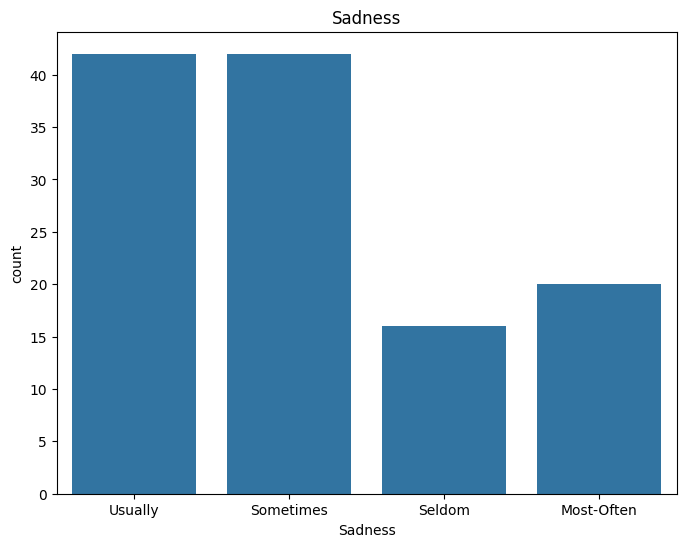

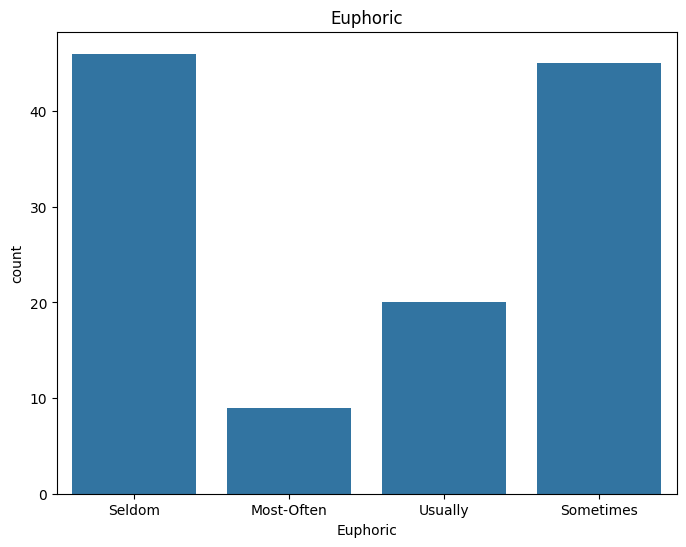

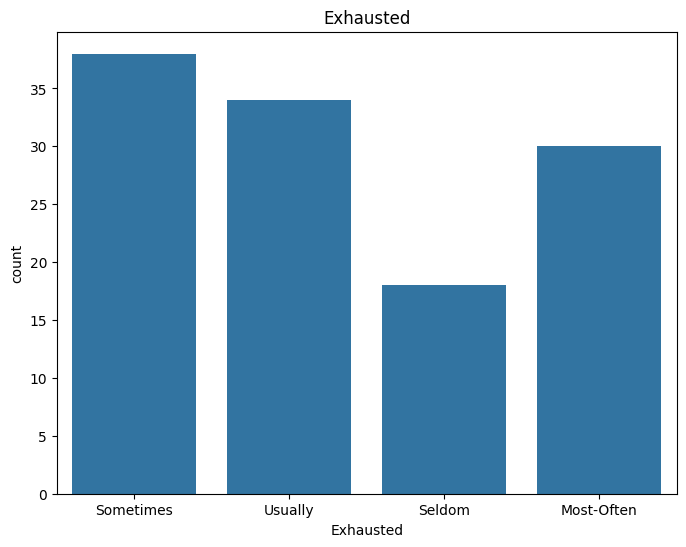

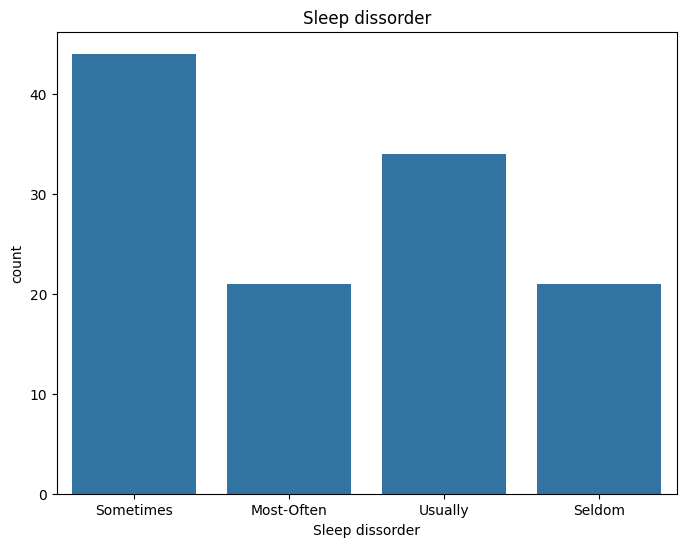

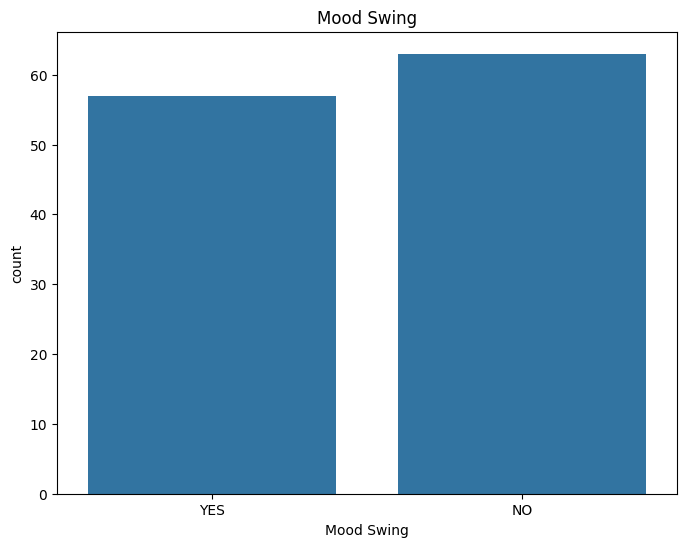

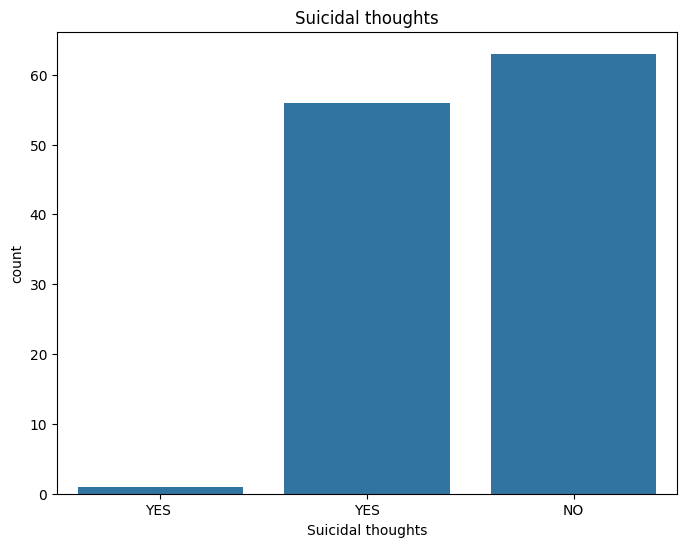

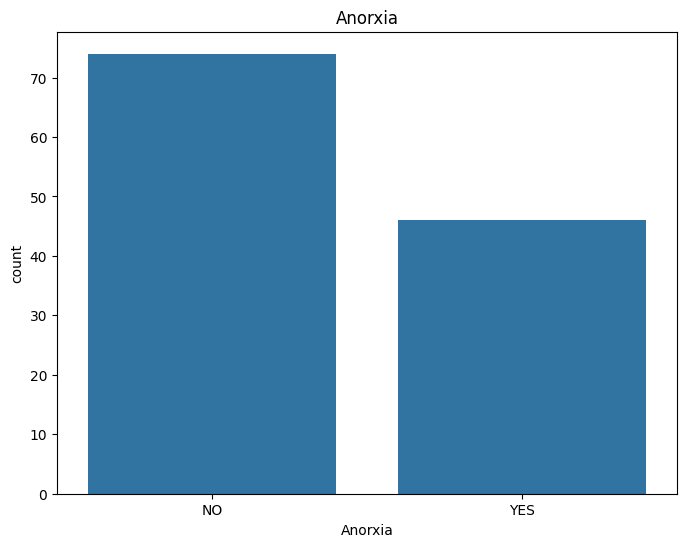

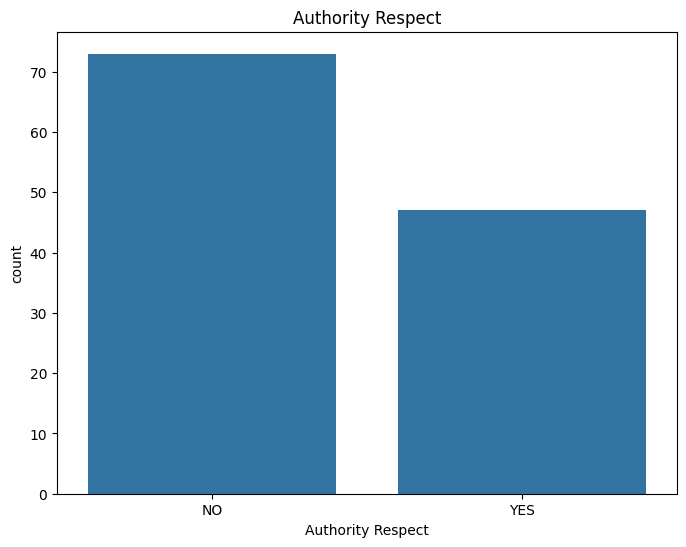

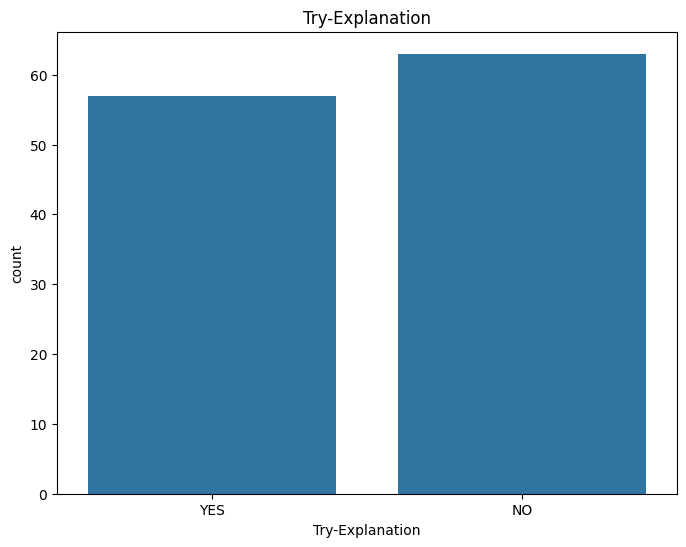

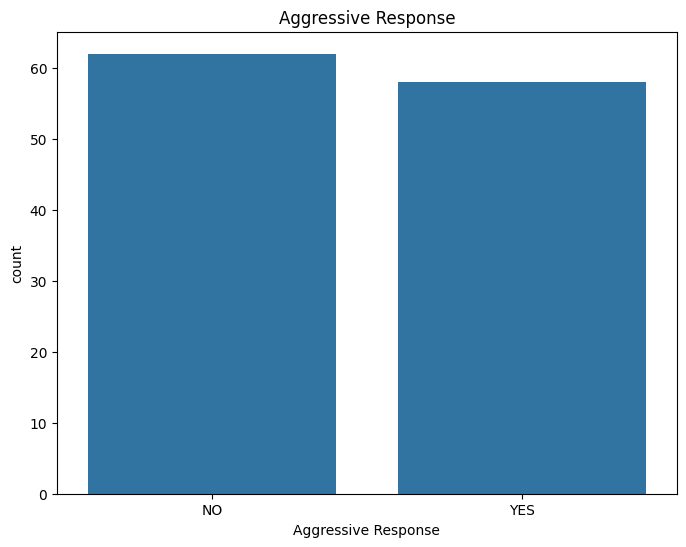

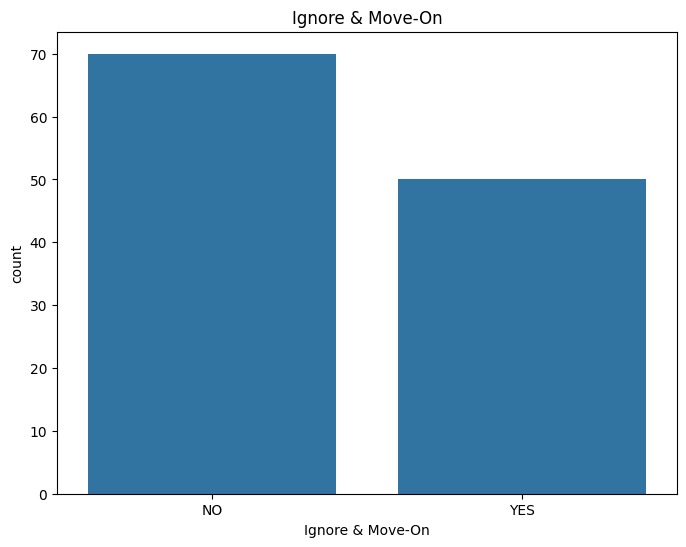

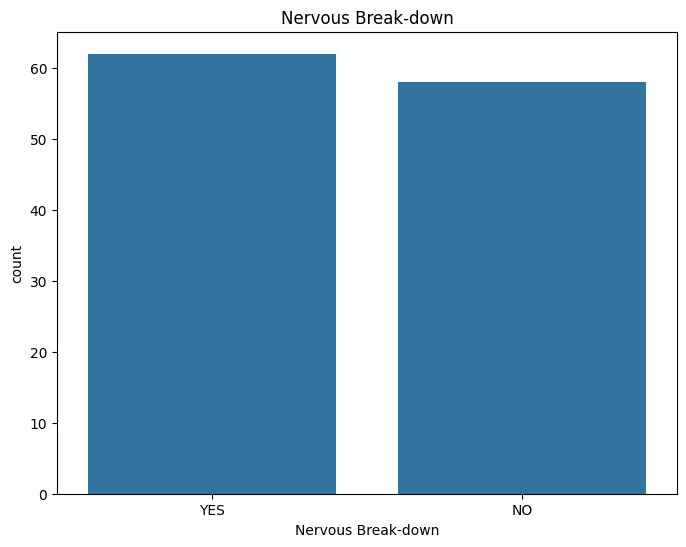

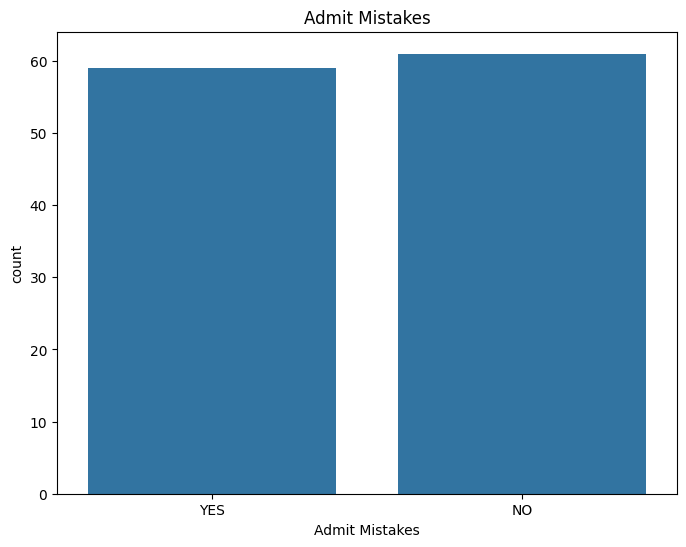

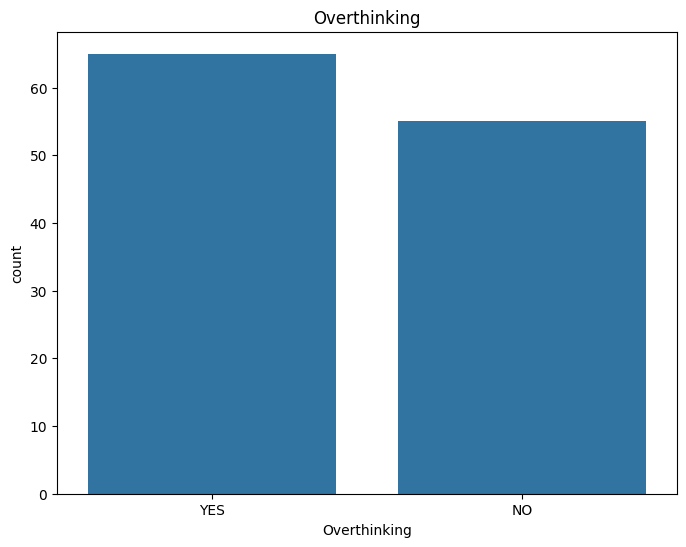

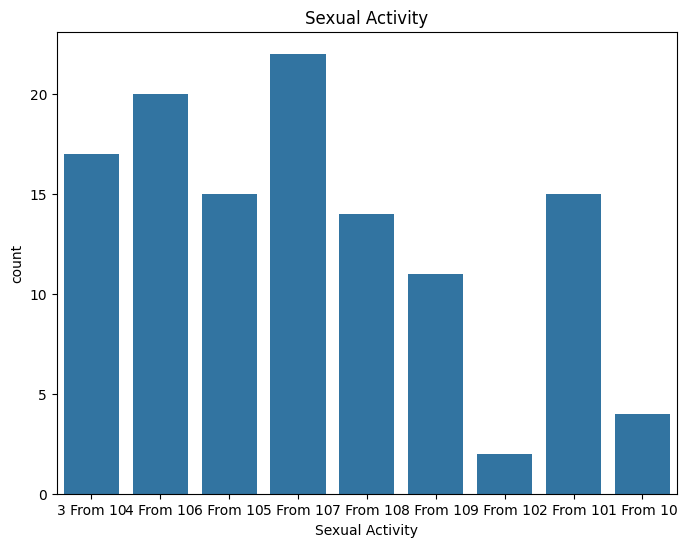

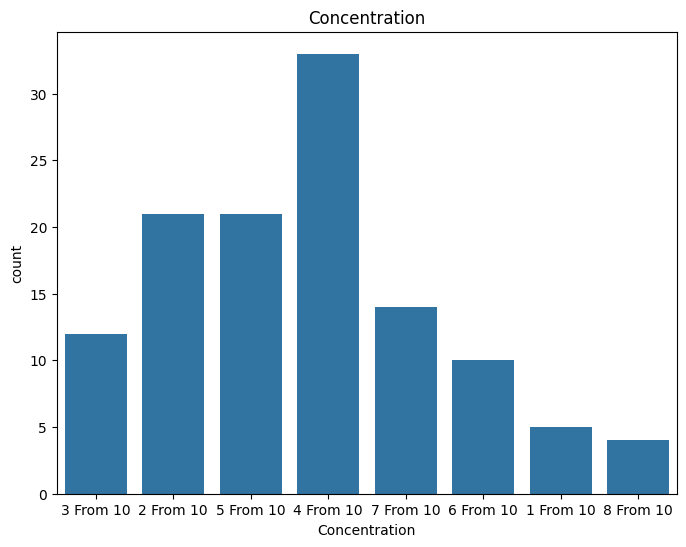

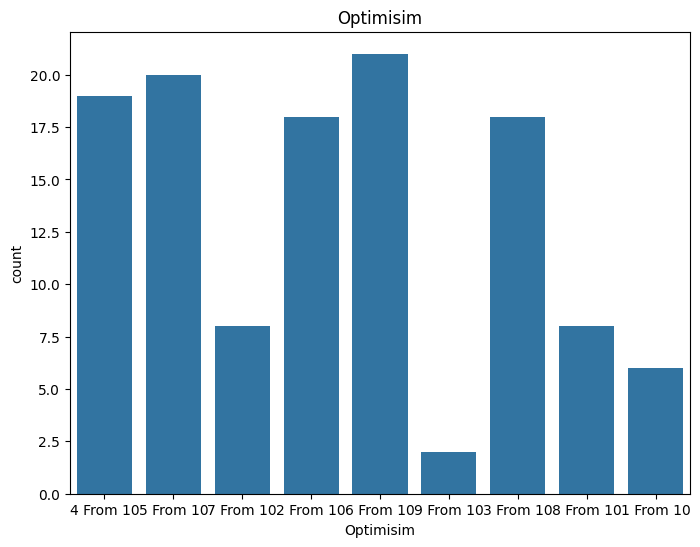

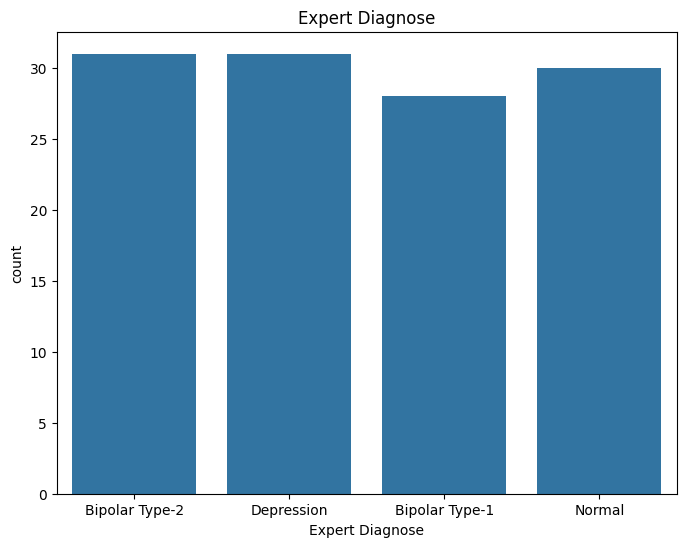

In [37]:
#Graph each column to analyse the data better and see if we find any typographical errors

columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']

for column in columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=df)
  plt.title(column)
  plt.show()

Columna Suicidal thoughts: 2 sublevels


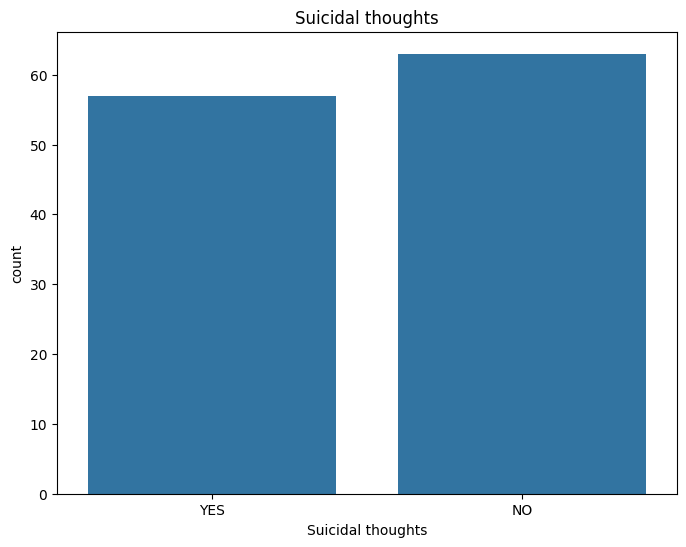

In [55]:
#Suicidal thoughts has 2 "Yes" as categories of response

#Change all value not 'No' to 'yes
df.loc[df['Suicidal thoughts'] != 'NO', 'Suicidal thoughts'] = 'YES'

print('Columna Suicidal thoughts:', df['Suicidal thoughts'].nunique(), 'sublevels')

plt.figure(figsize=(8, 6))
sns.countplot(x='Suicidal thoughts', data=df)
plt.title('Suicidal thoughts')
plt.show()


In [59]:
#Patient number column is not relevant
df = df.drop(columns=['Patient Number'])

In [62]:
#Check if the dataset is balanced considering the categories to estimate

df['Expert Diagnose'].value_counts()

,count
Expert Diagnose,
Bipolar Type-2,31
Depression,31
Normal,30
Bipolar Type-1,28


**Since all the categories have almost the same number of samples, we are working with a balanced dataset**

In [60]:
#Separate into predictor variables and variables to be predicted

df_predict = df['Expert Diagnose']
df_predictor = df.drop(columns=['Expert Diagnose'])

print(df_predictor.shape)
print(df_predict.shape)

(120, 17)
(120,)


In [67]:
#Transform all the categorical variables to numeric variables

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_predictor)
cat_ohe = ohe.transform(df_predictor)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = df_predictor.columns)).reset_index(drop = True)

cat_ohe.head(20)

,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Concentration_8 From 10,Optimisim_1 From 10,Optimisim_2 From 10,Optimisim_3 From 10,Optimisim_4 From 10,Optimisim_5 From 10,Optimisim_6 From 10,Optimisim_7 From 10,Optimisim_8 From 10,Optimisim_9 From 10
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4. ML Model**

In [68]:
#Reasign new dataframe to the one to be used in the model
df_ml = cat_ohe

In [70]:
#Separate the data into training, validation and testing sets
train_x, test_x, train_y, test_y = train_test_split(df_ml, df_predict, test_size = 0.2)  #80% Training, 20% Test
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.25)   # 0.25 * 0.8 = 0.2 validation


In [72]:
#KNN Model

categories_classifcation = 4

knn_classifier = KNeighborsClassifier(n_neighbors=categories_classifcation)
knn_classifier.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=4)

In [88]:
#Test the model

#Using validation data
y_val_pred = knn_classifier.predict(val_x)
accuracy_val = accuracy_score(val_y, y_val_pred)

print(f"Accuracy on validation set: {accuracy_val:.2f}")


#Using testing data
y_test_pred = knn_classifier.predict(test_x)
accuracy_test = accuracy_score(test_y, y_test_pred)

print(f"Accuracy on validation set: {accuracy_test:.2f}")


Accuracy on validation set: 0.71
Accuracy on validation set: 0.67


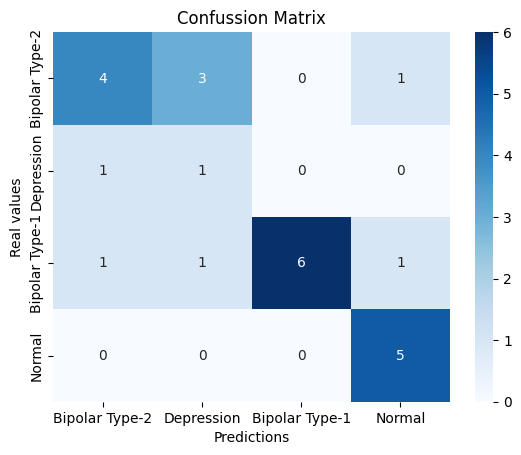

In [89]:
#Visualize confussion matrix
conf_matrix = confusion_matrix(test_y, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Expert Diagnose'].unique(), yticklabels=df['Expert Diagnose'].unique())
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.title('Confussion Matrix')
plt.show()

In [90]:
#Probabilites of each category per sample
proba_knn = knn_classifier.predict_proba(df_ml)
proba_knn

array([[0.  , 0.75, 0.25, 0.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [0.25, 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.5 , 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.75],
       [0.5 , 0.5 , 0.  , 0.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.75, 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.75, 0.25],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.

In [95]:
#Predict and save prediction as new column in original dataframe
df['prediction_knn']  = knn_classifier.predict(df_ml)

print(df)

        Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0       Usually      Seldom  Sometimes       Sometimes        YES   
1       Usually      Seldom    Usually       Sometimes         NO   
2     Sometimes  Most-Often  Sometimes       Sometimes        YES   
3       Usually      Seldom    Usually      Most-Often        YES   
4       Usually     Usually  Sometimes       Sometimes         NO   
..          ...         ...        ...             ...        ...   
115  Most-Often      Seldom    Usually       Sometimes         NO   
116   Sometimes   Sometimes  Sometimes          Seldom        YES   
117     Usually   Sometimes    Usually       Sometimes        YES   
118     Usually   Sometimes     Seldom          Seldom         NO   
119   Sometimes     Usually     Seldom         Usually         NO   

    Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0                 YES      NO                NO             YES   
1                 YES      NO        

In [107]:
#Compare prediction with real values from testing set
results = knn_classifier.predict(test_x)

print('Real Value - Prediction - Status Prediction \n')
for i in range(len(results)):
  print(test_y.iloc[i] , "-", results[i], "-" , "Correct" if test_y.iloc[i] == results[i] else "Incorrect")


Real Value - Prediction - Status Prediction 

Bipolar Type-1 - Bipolar Type-2 - Incorrect
Bipolar Type-1 - Bipolar Type-2 - Incorrect
Depression - Normal - Incorrect
Normal - Normal - Correct
Bipolar Type-1 - Bipolar Type-1 - Correct
Depression - Depression - Correct
Depression - Depression - Correct
Depression - Bipolar Type-2 - Incorrect
Bipolar Type-2 - Bipolar Type-1 - Incorrect
Normal - Normal - Correct
Bipolar Type-2 - Bipolar Type-2 - Correct
Bipolar Type-1 - Bipolar Type-1 - Correct
Normal - Normal - Correct
Depression - Depression - Correct
Depression - Depression - Correct
Bipolar Type-1 - Normal - Incorrect
Bipolar Type-1 - Bipolar Type-1 - Correct
Depression - Depression - Correct
Depression - Depression - Correct
Normal - Normal - Correct
Bipolar Type-1 - Bipolar Type-2 - Incorrect
Normal - Normal - Correct
Bipolar Type-1 - Bipolar Type-1 - Correct
Depression - Bipolar Type-1 - Incorrect
